In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from import_me import *

In [2]:
# array = readSave(readfileName = "output.data")
# plt.imshow(plt.imread("output.bmp"))

In [3]:
with open("red_dot.bmp", "rb")as f:
    _ = f.read()
orig = np.frombuffer(_, dtype = np.uint8)

In [4]:
orig

array([ 66,  77, 122, ...,  72,  72,  72], dtype=uint8)

In [5]:
header = orig[:122]
#preamble = np.unpackbits(preamble)

In [6]:
# %%time
# img = readOutput("output.data", np.array([67, 255], dtype = np.uint8), header, (450, 600))
# plt.imshow(img)

# # Photographer: Wolfgang Kaehler/Getty Images

In [7]:
def findBitShift_and_Begin2(rcv_bitmap):
    for i in range(8):
        aux = search_sequence_numpy(np.packbits(np.roll(np.unpackbits(rcv_bitmap), i)), np.array([66, 77, 138]))
        if len(aux) != 0:
            return (i, aux[0])

In [8]:
def saveRcvImage2(fileName, rcv, save = False):
    tupla = findBitShift_and_Begin2(rcv)
    gravar = np.roll(np.packbits(np.roll(np.unpackbits(rcv), tupla[0])), -tupla[1])
    if save:
        with open(fileName, "wb") as f:
            f.write(gravar)
    return gravar

In [9]:
def readSave2(readfileName, savefileName = "output.bmp", save = False, delete = False):
    with open(readfileName, "rb") as f:
        b = f.read()
    rcv = np.frombuffer(b, dtype = np.uint8)
    r = saveRcvImage2(savefileName, rcv, save = save)
    if delete == True:
        os.remove(readfileName)
    return r

In [10]:
with open("output.data", "rb") as f:
    b = f.read()
rcv = np.frombuffer(b, dtype = np.uint8)

In [11]:
rcv

array([196,   4,  16, ...,   4,  16, 255], dtype=uint8)

In [12]:
array = readSave2("output.data", save = True)

TypeError: 'NoneType' object is not subscriptable

In [ ]:
array

In [ ]:
orig

In [ ]:
plt.imshow(np.flipud(cv2.cvtColor(array[122:].reshape(450, 600, 3), cv2.COLOR_BGR2RGB)).ravel().reshape(450, 600, 3))

In [ ]:
orig_NoPreamble = orig[122:]

In [13]:
len(img.ravel())

NameError: name 'img' is not defined

In [14]:
rcv = np.flipud(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)).ravel()

NameError: name 'img' is not defined

In [15]:
np.mean(np.equal(orig_NoPreamble, array[122:]))

NameError: name 'orig_NoPreamble' is not defined

In [16]:
bit_orig = np.unpackbits(orig_NoPreamble)
bit_rcv = np.unpackbits(array[122:])

NameError: name 'orig_NoPreamble' is not defined

In [17]:
np.mean(np.equal(bit_orig, bit_rcv))

NameError: name 'bit_orig' is not defined

In [18]:
np.argwhere(np.equal(bit_orig, bit_rcv) == False)[1023208//2:][:100]

NameError: name 'bit_orig' is not defined

In [19]:
a = 4169524

In [20]:
bit_orig[a:][:200]

NameError: name 'bit_orig' is not defined

In [21]:
s1 = "".join([str(x) for x in bit_orig[a:][:200]])

NameError: name 'bit_orig' is not defined

In [22]:
bit_rcv[a:][:200]

NameError: name 'bit_rcv' is not defined

In [23]:
def edit_distance(s, t):

    D = [[0 for n in range(len(t) + 1)] for m in range(len(s) + 1)]

    for i in range(len(s) + 1):
        D[i][0] = i
    
    for j in range(len(t) + 1):
        D[0][j] = j

    # print(D)

    for i in range(1, len(s) + 1):
        for j in range(1, len(t) + 1):
            insertion = D[i][j - 1] + 1
            deletion = D[i - 1][j] + 1
            match = D[i - 1][j - 1]
            mismatch = D[i - 1][j - 1] + 1

            if s[i - 1] == t[j - 1]:
                D[i][j] = min(insertion, deletion, match)
            else:
                D[i][j] = min(insertion, deletion, mismatch)

    return D[len(s)][len(t)]

In [24]:
s2 = "".join([str(x) for x in bit_rcv[a:][:200]])

NameError: name 'bit_rcv' is not defined

In [25]:
edit_distance(s1, s2)

NameError: name 's1' is not defined

In [26]:
###############

CPU times: user 4.99 s, sys: 0 ns, total: 4.99 s
Wall time: 4.99 s


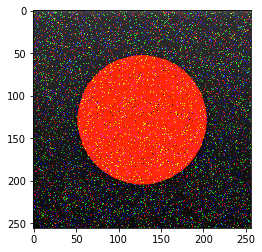

In [42]:
%%time
img = readOutput("output.data", np.array([67 + 0, 255 - 0], dtype = np.uint8), header, (256, 256))
plt.imshow(img)

In [43]:
orig2 = cv2.cvtColor(np.flipud(orig[122:].reshape(256, 256, 3)), cv2.COLOR_BGR2RGB).ravel()

In [44]:
1 - np.mean(np.equal(np.unpackbits(orig2), np.unpackbits(img.ravel()[:])))

0.04423014322916663

In [ ]:
####

In [ ]:
with open("red_dot.bmp", "rb")as f:
    _ = f.read()
orig = np.frombuffer(_, dtype = np.uint8)

header = orig[:122]
#preamble = np.unpackbits(preamble)

In [ ]:
# %%time
# img = readOutput("output.data", np.array([67 + 0, 255], dtype = np.uint8), header, (256, 256))
# plt.imshow(img)

In [ ]:
# %%time
# img = readOutput("output.data", np.array([67 + 128, 255 - 1], dtype = np.uint8), header, (256, 256))
# plt.imshow(img)
# # mini_header com 1 bit errado (67 -> 66) pode dar os padrão de interferência já encontrados antes quando estava
# # usando o tagged_stream_align no gnuradio, melhor não usar esse bloco (usar apenas o stream mux) e processar
# # o header em python conforme acima utilizando as funções em import_me

In [ ]:
#####

In [50]:
with open("output.data", "rb") as f:
    b = f.read()
rcv = np.frombuffer(b, dtype = np.uint8)
#rcv = np.roll(np.packbits(np.roll(np.unpackbits(rcv), 7)), 0)

In [51]:
rcv_array = np.packbits(np.roll(np.unpackbits(rcv), -np.argmax(np.correlate(np.unpackbits(rcv), np.unpackbits(header)))))

In [52]:
rcv_array

array([115, 127, 115, ..., 115, 115, 112], dtype=uint8)

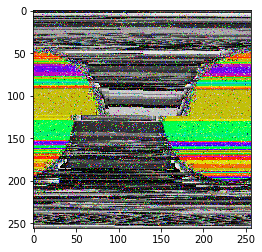

In [53]:
plt.imshow(cv2.cvtColor(np.flipud(rcv_array[122:].reshape(256, 256, 3)), cv2.COLOR_BGR2RGB))

In [54]:
rcv_array.shape[0] * 8

1573840

In [38]:
rcv[:100]

array([26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
       26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
       26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
       26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27],
      dtype=uint8)

In [39]:
%%time
result = 0
for bit_shift in range(8):
    aux = np.packbits(np.roll(np.unpackbits(rcv), bit_shift))
    if len(search_sequence_numpy(aux, np.array([67, 255]))) > result:
        result = bit_shift
rcv2 = np.packbits(np.roll(np.unpackbits(rcv), result))
print(rcv2[:100])

[26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26
 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26
 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 27 27 27 27 27 27 27 27
 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
 27 27 27 27]
CPU times: user 104 ms, sys: 0 ns, total: 104 ms
Wall time: 103 ms


In [40]:
ref, result = len(rcv2), 0
for shiftByte in range(2 + 2):
    aux = np.roll(rcv2, shiftByte)
    aux = np.array([x for i, x in enumerate(aux) if i % 4 >= 2])
    _ = len(search_sequence_numpy(aux, np.array([67, 255])))
    if _ < ref:
        ref = _
        result = shiftByte
info = np.array([x for i, x in enumerate(np.roll(rcv2, result)) if i % 4 >= 2])
info[:100]

array([26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
       26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 25, 25, 25, 25, 25, 25, 25, 24],
      dtype=uint8)

In [41]:
info.shape

(98364,)

In [42]:
#search_sequence_numpy(info, np.array([66, 77]))

In [43]:
#findBitShift_and_Begin(info)

In [21]:
preamble = np.array([ 66,  77, 122,   0,   3,   0,   0,   0,   0,   0, 122,   0,   0,
         0, 108,   0,   0,   0,   0,   1,   0,   0,   0,   1,   0,   0,
         1,   0,  24,   0,   0,   0,   0,   0,   0,   0,   3,   0,  19,
        11,   0,   0,  19,  11,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  66,  71,  82, 115,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0], dtype = np.uint8)
preamble = np.unpackbits(preamble)
#preamble

In [22]:
#np.argmax(np.correlate(np.unpackbits(info), preamble))

In [23]:
rcv_array = np.packbits(np.roll(np.unpackbits(info), -np.argmax(np.correlate(np.unpackbits(info), preamble))))

In [24]:
bgr = np.flipud(rcv_array[122:].reshape(256, 256, 3))
plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))

ValueError: cannot reshape array of size 98242 into shape (256,256,3)

In [ ]:
####

In [25]:
with open("red_dot.bmp", "rb")as f:
    _ = f.read()
orig = np.frombuffer(_, dtype = np.uint8)

In [26]:
orig[:122]

array([ 66,  77, 122,   0,   3,   0,   0,   0,   0,   0, 122,   0,   0,
         0, 108,   0,   0,   0,   0,   1,   0,   0,   0,   1,   0,   0,
         1,   0,  24,   0,   0,   0,   0,   0,   0,   0,   3,   0,  19,
        11,   0,   0,  19,  11,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  66,  71,  82, 115,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0], dtype=uint8)

In [27]:
rcv_array[:122]

array([ 83,  83, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115,
       115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115,
       115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115,
       115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115,
       115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115,
       115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115,
       115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115,
       115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115,
       115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115,
       115, 115, 115, 115, 115], dtype=uint8)

In [28]:
np.sum(np.equal(orig, rcv_array))

ValueError: operands could not be broadcast together with shapes (196730,) (98364,) 

In [29]:
#byte error rate
len(np.nonzero(orig - rcv_array)[0])/len(orig)

ValueError: operands could not be broadcast together with shapes (196730,) (98364,) 

In [30]:
#bit error rate
len(np.nonzero(np.unpackbits(orig) - np.unpackbits(rcv_array))[0]) / len(np.unpackbits(orig))

ValueError: operands could not be broadcast together with shapes (1573840,) (786912,) 

In [31]:
# BIT ERROR RATES -> NOISE VOLTAGE = 0.7
# BCH (15, 7, t = 2): 0.00018553347227164132, 0.00021857367966248158
# Sem Codificação: 0.004680907843236924, 0.004662481573730493
# Com Hamming (7, 4): 0.0052927870685711385 (Aumento por causa do diff Encoding -> Erros Juntos).

In [ ]:
np.nonzero(np.unpackbits(orig) - np.unpackbits(rcv_array))[0][:100]